In [2]:
import seaborn as sn
import pandas as pd

In [3]:
df=sn.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
## We have missing in age,embarked and embark_town 

/tmp/ipykernel_70/2663424044.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

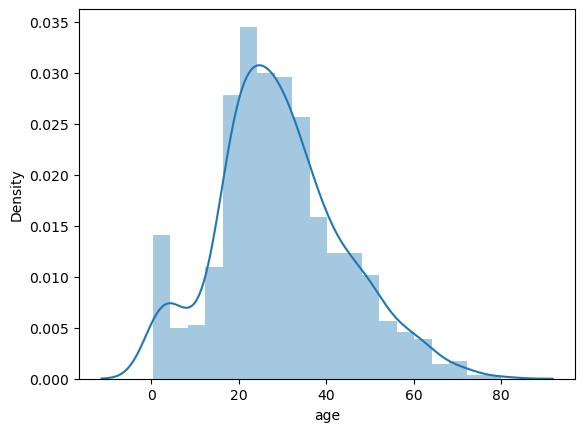

In [9]:
sn.distplot(df['age'])

In [ ]:
## Looks somewhat like normal distribution hence we will check the mean and median

In [12]:
df['age'].mean()


29.69911764705882

In [14]:
df['age'].median()

28.0

In [ ]:
##mean and median are almost same so we will do mean imputation here

In [15]:
df['Avg_age']=df['age'].fillna(df['age'].mean())

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Avg_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


In [17]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
Avg_age          0
dtype: int64

In [18]:
##checking mode for embarked
df['embarked'].mode()

0    S
Name: embarked, dtype: object

In [19]:
df['Embarked_mode']=df['embarked'].fillna(df['embarked'].mode()[0])

In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Avg_age,Embarked_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,S
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,S
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,S


In [21]:
df.isnull().sum()

survived           0
pclass             0
sex                0
age              177
sibsp              0
parch              0
fare               0
embarked           2
class              0
who                0
adult_male         0
deck             688
embark_town        2
alive              0
alone              0
Avg_age            0
Embarked_mode      0
dtype: int64

<AxesSubplot: >

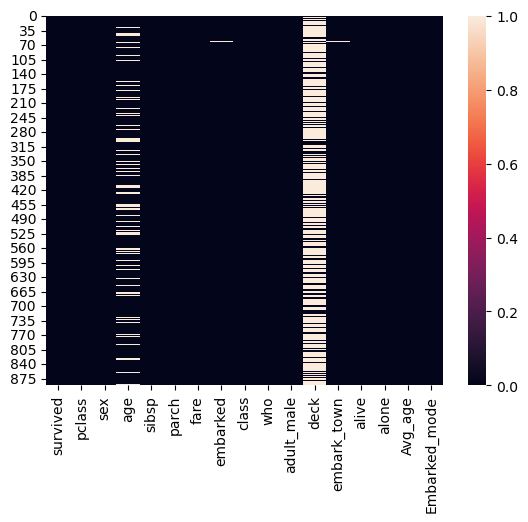

In [24]:
sn.heatmap(df.isnull())

In [26]:
df['embark_town'].mode()

0    Southampton
Name: embark_town, dtype: object

In [28]:
df['embark_town_mode']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [29]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Avg_age,Embarked_mode,embark_town_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,S,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,C,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,S,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,S,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,S,Southampton


In [32]:
df_up=df[['survived','pclass','sex','sibsp','parch','fare','class','who','adult_male','deck','alive','alone','Avg_age','Embarked_mode','embark_town_mode']]

In [35]:
##writing this to another SCV file
df_up.to_csv('new_titanic.csv',index=False)

In [36]:
import os

In [38]:
os.remove('new_titanic.csv.')

In [ ]:
## Exercise of Missing Value

In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Diabetes%20Missing%20Data.csv')

In [4]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [6]:
import seaborn as sns

<AxesSubplot: >

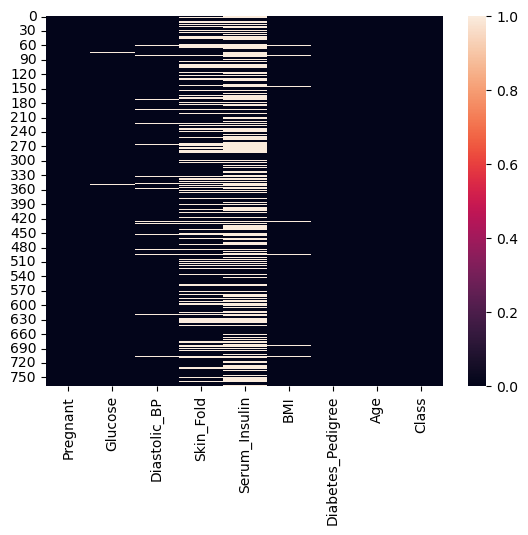

In [7]:
sns.heatmap(df.isnull())

In [8]:
df['Diastolic_BP'].dropna()

0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: Diastolic_BP, Length: 733, dtype: float64

In [9]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [14]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

/tmp/ipykernel_77/2512680699.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Glucose'])


<AxesSubplot: xlabel='Glucose', ylabel='Density'>

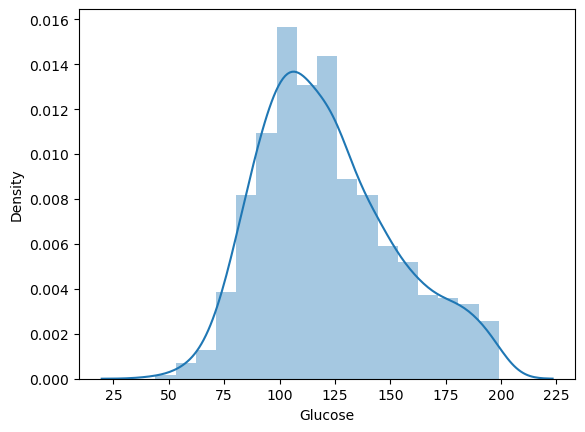

In [17]:
sns.distplot(df['Glucose'])

In [18]:
df['Avg_Glucose']=df['Glucose'].fillna(df['Glucose'].mean())

/tmp/ipykernel_77/618079780.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Diastolic_BP'])


<AxesSubplot: xlabel='Diastolic_BP', ylabel='Density'>

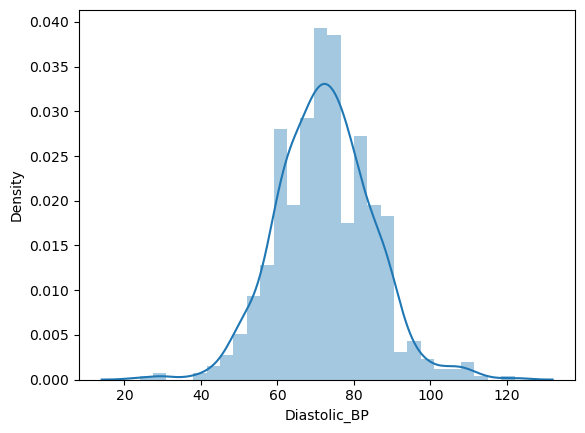

In [20]:
sns.distplot(df['Diastolic_BP'])

In [22]:
df['Avg_Diastolic_BP']=df['Glucose'].fillna(df['Glucose'].mean())

In [25]:
df['Avg_Skin_Fold']=df['Skin_Fold'].fillna(df['Skin_Fold'].mean())

In [26]:
df['Avg_Serum_Insulin']=df['Serum_Insulin'].fillna(df['Serum_Insulin'].mean())

In [27]:
df['Avg_BMI']=df['BMI'].fillna(df['BMI'].mean())

In [28]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class,Avg_Glucose,Avg_Diastolic_BP,Avg_Skin_Fold,Avg_Serum_Insulin,Avg_BMI
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,148.0,148.0,35.00000,155.548223,33.6
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,85.0,85.0,29.00000,155.548223,26.6
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,183.0,183.0,29.15342,155.548223,23.3
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,89.0,89.0,23.00000,94.000000,28.1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,137.0,137.0,35.00000,168.000000,43.1
